<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Solutions/Session_5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

## 5.2.1

In [2]:

air_temp = pd.read_excel("https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/Au%C3%9Fenluft%2BEingangslabyrinth.xlsx", sheet_name="Daten3", usecols=[0,6], names=["time", "air_temp"])
cave_temp = pd.read_excel("https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/Au%C3%9Fenluft%2BEingangslabyrinth.xlsx", sheet_name="Daten3", usecols=[8,9], names=["time", "cave_temp"])
cave_co2 = pd.read_excel(r"https://github.com/ds4geo/ds4geo/raw/master/data/timeseries/CO2%20_compiled.xlsx",
                         sheet_name="Data Stream (2)", names=["time", "unknown", "d13C", "d18O", "ppm CO2", "ctime"])

## 5.2.2

(735858.0, 735922.0)

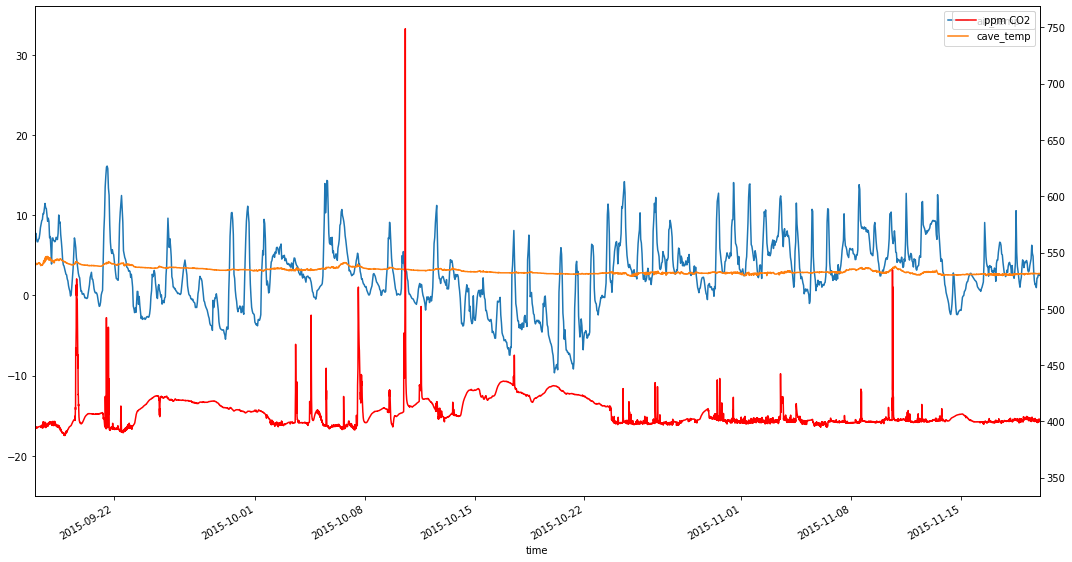

In [3]:
fig, ax = plt.subplots(figsize=(18,10))
ax2 = ax.twinx()
air_temp.plot("time", "air_temp", ax=ax)
cave_temp.plot("time", "cave_temp", ax=ax)
cave_co2.plot("time", "ppm CO2", ax=ax2, color="r")
ax.set_xlim([datetime.date(2015,9,17), datetime.date(2015,11,20)])

## 5.2.3

In [4]:
# ANSWERS
# get data only in range
air_temp.index = air_temp.time # make time the index
air_select = air_temp.loc["2015-9-17" : "2015-11-20"]

cave_temp.index = cave_temp.time
cave_select = cave_temp.loc["2015-9-17" : "2015-11-20"]

cave_co2.index = cave_co2.time
co2_select = cave_co2.loc["2015-9-17" : "2015-11-20"]

## 5.2.4

In [5]:
#ANSWERS
# Check lengths
print("air data shape:", air_select.shape)
print("cave data shape:", cave_select.shape)
print("co2 data shape:", co2_select.shape)
# Check sampling rate/timing
print("air sampling rate:",(air_select.index[1:] - air_select.index[:-1]).value_counts())
print("cave sampling rate:",(cave_select.index[1:] - cave_select.index[:-1]).value_counts())
print("co2 sampling rate:",(co2_select.index[1:] - co2_select.index[:-1]).value_counts())
# air is 1 hour, cave temp is 15 mins, co2 is all over the place. Mostly around 5 minutes, but sometimes 10, or much longer.
# If we resample to the cave temp 15 mins, then we are upsampling air temp, and downsampling the co2 data

air data shape: (1560, 2)
cave data shape: (6240, 2)
co2 data shape: (15378, 6)
air sampling rate: 0 days 01:00:00    1559
Name: time, dtype: int64
cave sampling rate: 0 days 00:15:00    6239
Name: time, dtype: int64
co2 sampling rate: 0 days 00:05:00.004000    2824
0 days 00:05:00.020000     997
0 days 00:04:59.989000     792
0 days 00:09:01.009000     782
0 days 00:04:59.988000     738
                          ... 
0 days 00:04:59.941000       1
0 days 00:17:21.960000       1
0 days 00:05:00.129000       1
0 days 00:09:00.037000       1
0 days 00:17:21.965000       1
Name: time, Length: 400, dtype: int64


##5.5.1

In [7]:
from scipy import interpolate

## 5.5.2

In [ ]:
interpf = interpolate.interp1d(air_select.time.to_numpy().astype(float), air_select.air_temp, kind="linear", fill_value="extrapolate")
air_interp = interpf(cave_select.time.to_numpy().astype(float))

#5.5.3

In [13]:
# Interpolate d13C
interpf = interpolate.interp1d(co2_select.time.to_numpy().astype(float), co2_select.d13C, kind="linear", fill_value="extrapolate")
d13C_interp = interpf(cave_select.time.to_numpy().astype(float))

# Interpolate d18O
interpf = interpolate.interp1d(co2_select.time.to_numpy().astype(float), co2_select.d18O, kind="linear", fill_value="extrapolate")
d18O_interp = interpf(cave_select.time.to_numpy().astype(float))

# Interpolate ppm CO2
interpf = interpolate.interp1d(co2_select.time.to_numpy().astype(float), co2_select["ppm CO2"], kind="linear", fill_value="extrapolate")
ppm_interp = interpf(cave_select.time.to_numpy().astype(float))


#5.5.4

(375.0, 450.0)

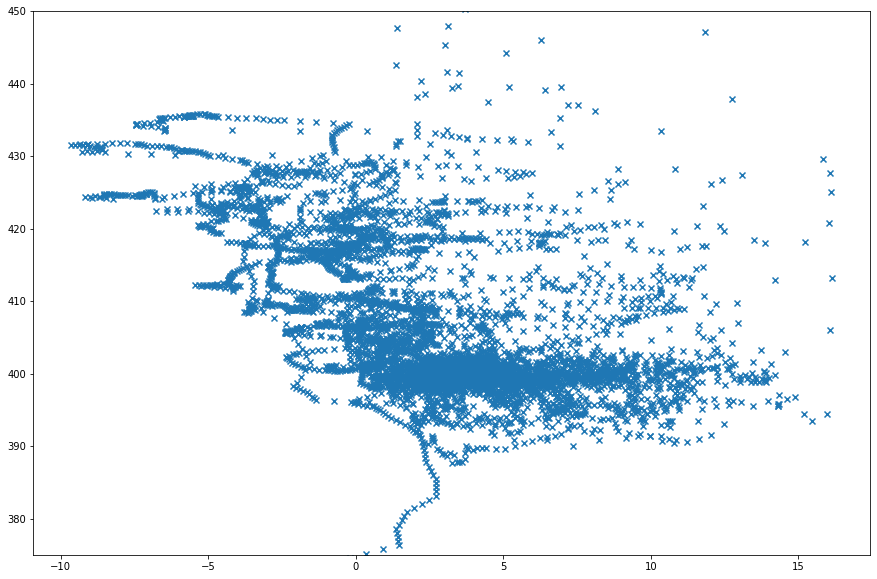

In [19]:
# CO2 ppm vs surface temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter( air_interp, ppm_interp, marker="x")
ax.set_ylim([375, 450])

(375.0, 450.0)

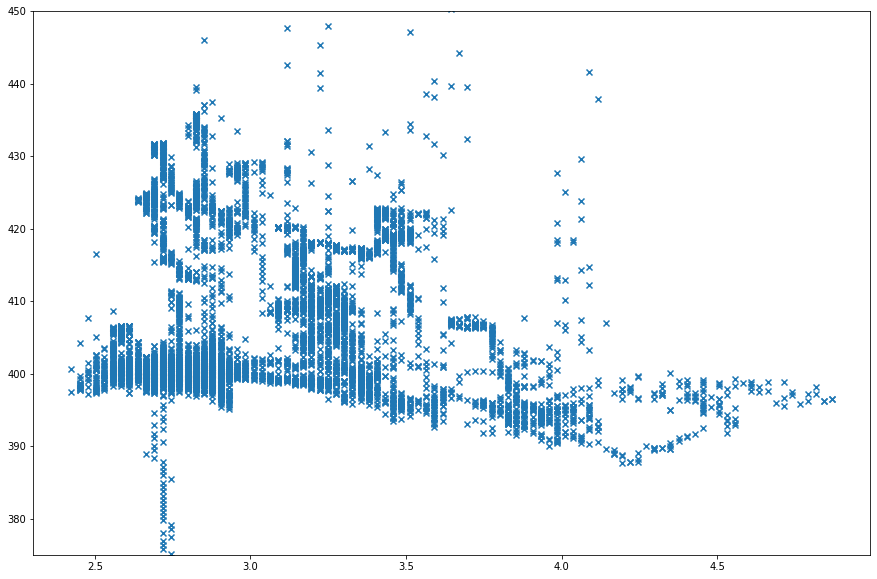

In [20]:
# CO2 ppm vs cave temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter( cave_select.cave_temp, ppm_interp, marker="x")
ax.set_ylim([375, 450])

(375.0, 450.0)

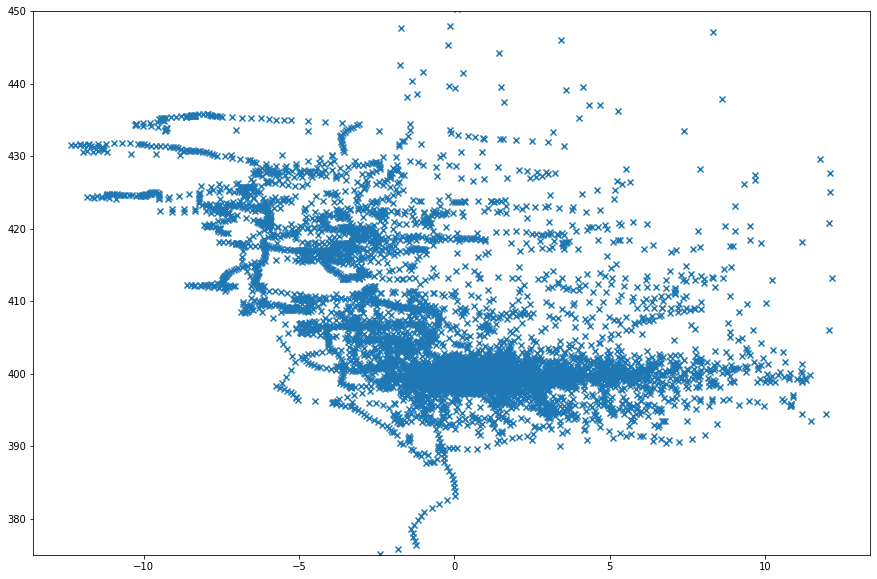

In [21]:
# CO2 ppm vs surface-cave temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter( air_interp-cave_select.cave_temp, ppm_interp, marker="x")
ax.set_ylim([375, 450])

##5.5.4

In [ ]:
### ANSWERS
# Testing upsampling of air temps
kinds = ["linear", "nearest", "zero", "slinear", "quadratic", "cubic"]#, "previous", "next"]
intp_air = []
for k in kinds:
  interpf = interpolate.interp1d(air_select.time.to_numpy().astype(float), air_select.air_temp, kind=k, fill_value="extrapolate")
  air_interp = interpf(cave_select.time.to_numpy().astype(float))
  intp_air.append(air_interp)

fig, ax = plt.subplots(figsize=(15,10))
for i,l in zip(intp_air, kinds):
  ax.plot(cave_select.index, i, "x-", label=l)
ax.plot(air_select.index, air_select.air_temp, "o")
ax.set_xlim(datetime.date(2015,10,15), datetime.date(2015,10,16))
ax.set_ylim(-4, 3)
ax.legend()

##5.7

In [ ]:
#### ANSWER
xdat = pd.read_csv("https://doi.pangaea.de/10.1594/PANGAEA.859980?format=textfile", header=48, sep="\t")

# Try plotting with bokeh so is interactive
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

p = figure()
p.line(xdat["Depth [m]"], xdat["V [cps]"], line_color="black")
for fl, col in zip([3,5,9,15],["green", "indigo", "blue", "coral"]):
  filter = np.ones(fl ) / fl
  Vf = np.convolve(xdat["V [cps]"],filter)
  p.line(xdat["Depth [m]"], Vf[int((fl-1)/2):-int((fl-1)/2)], line_color=col)

show(p)
